In [10]:
import numpy as np
import wrangle as w
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import typing
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [11]:
df = w.wrangle_zillow()
df = df[(df.bed_count <= 6) & (df.bath_count <=6)]
train, validate, test = w.tvt_split(df)
train.head()

,bed_count,bath_count,calc_finished_sqft,tax_value,year_built,taxes,fips
3652781,3,2.0,1585.0,428202.0,1983,5618.64,6037
643614,3,3.0,2413.0,1378099.0,1958,16313.48,6037
3479470,3,2.0,1405.0,73669.0,1971,1179.13,6037
797562,2,1.0,1064.0,45953.0,1926,825.59,6037
2950291,3,2.0,1608.0,294407.0,1942,3935.38,6037


In [12]:
train.head()

,bed_count,bath_count,calc_finished_sqft,tax_value,year_built,taxes,fips
3652781,3,2.0,1585.0,428202.0,1983,5618.64,6037
643614,3,3.0,2413.0,1378099.0,1958,16313.48,6037
3479470,3,2.0,1405.0,73669.0,1971,1179.13,6037
797562,2,1.0,1064.0,45953.0,1926,825.59,6037
2950291,3,2.0,1608.0,294407.0,1942,3935.38,6037


In [13]:
def plot_variable_pairs(df:pd.DataFrame):
    fig,axs = plt.subplots(df.shape[1],df.shape[1],figsize=(10,10))
    for i,col in enumerate(df):
        for j,scol in enumerate(df):
            if col == scol:
                sns.histplot(data=df,x=col,ax=axs[i,j])
            else:
                sns.scatterplot(data=df,x=col, y=scol, ax=axs[i,j])
                sns.regplot(data=df,x=col,y=scol,ax=axs[i,j])
    plt.show()

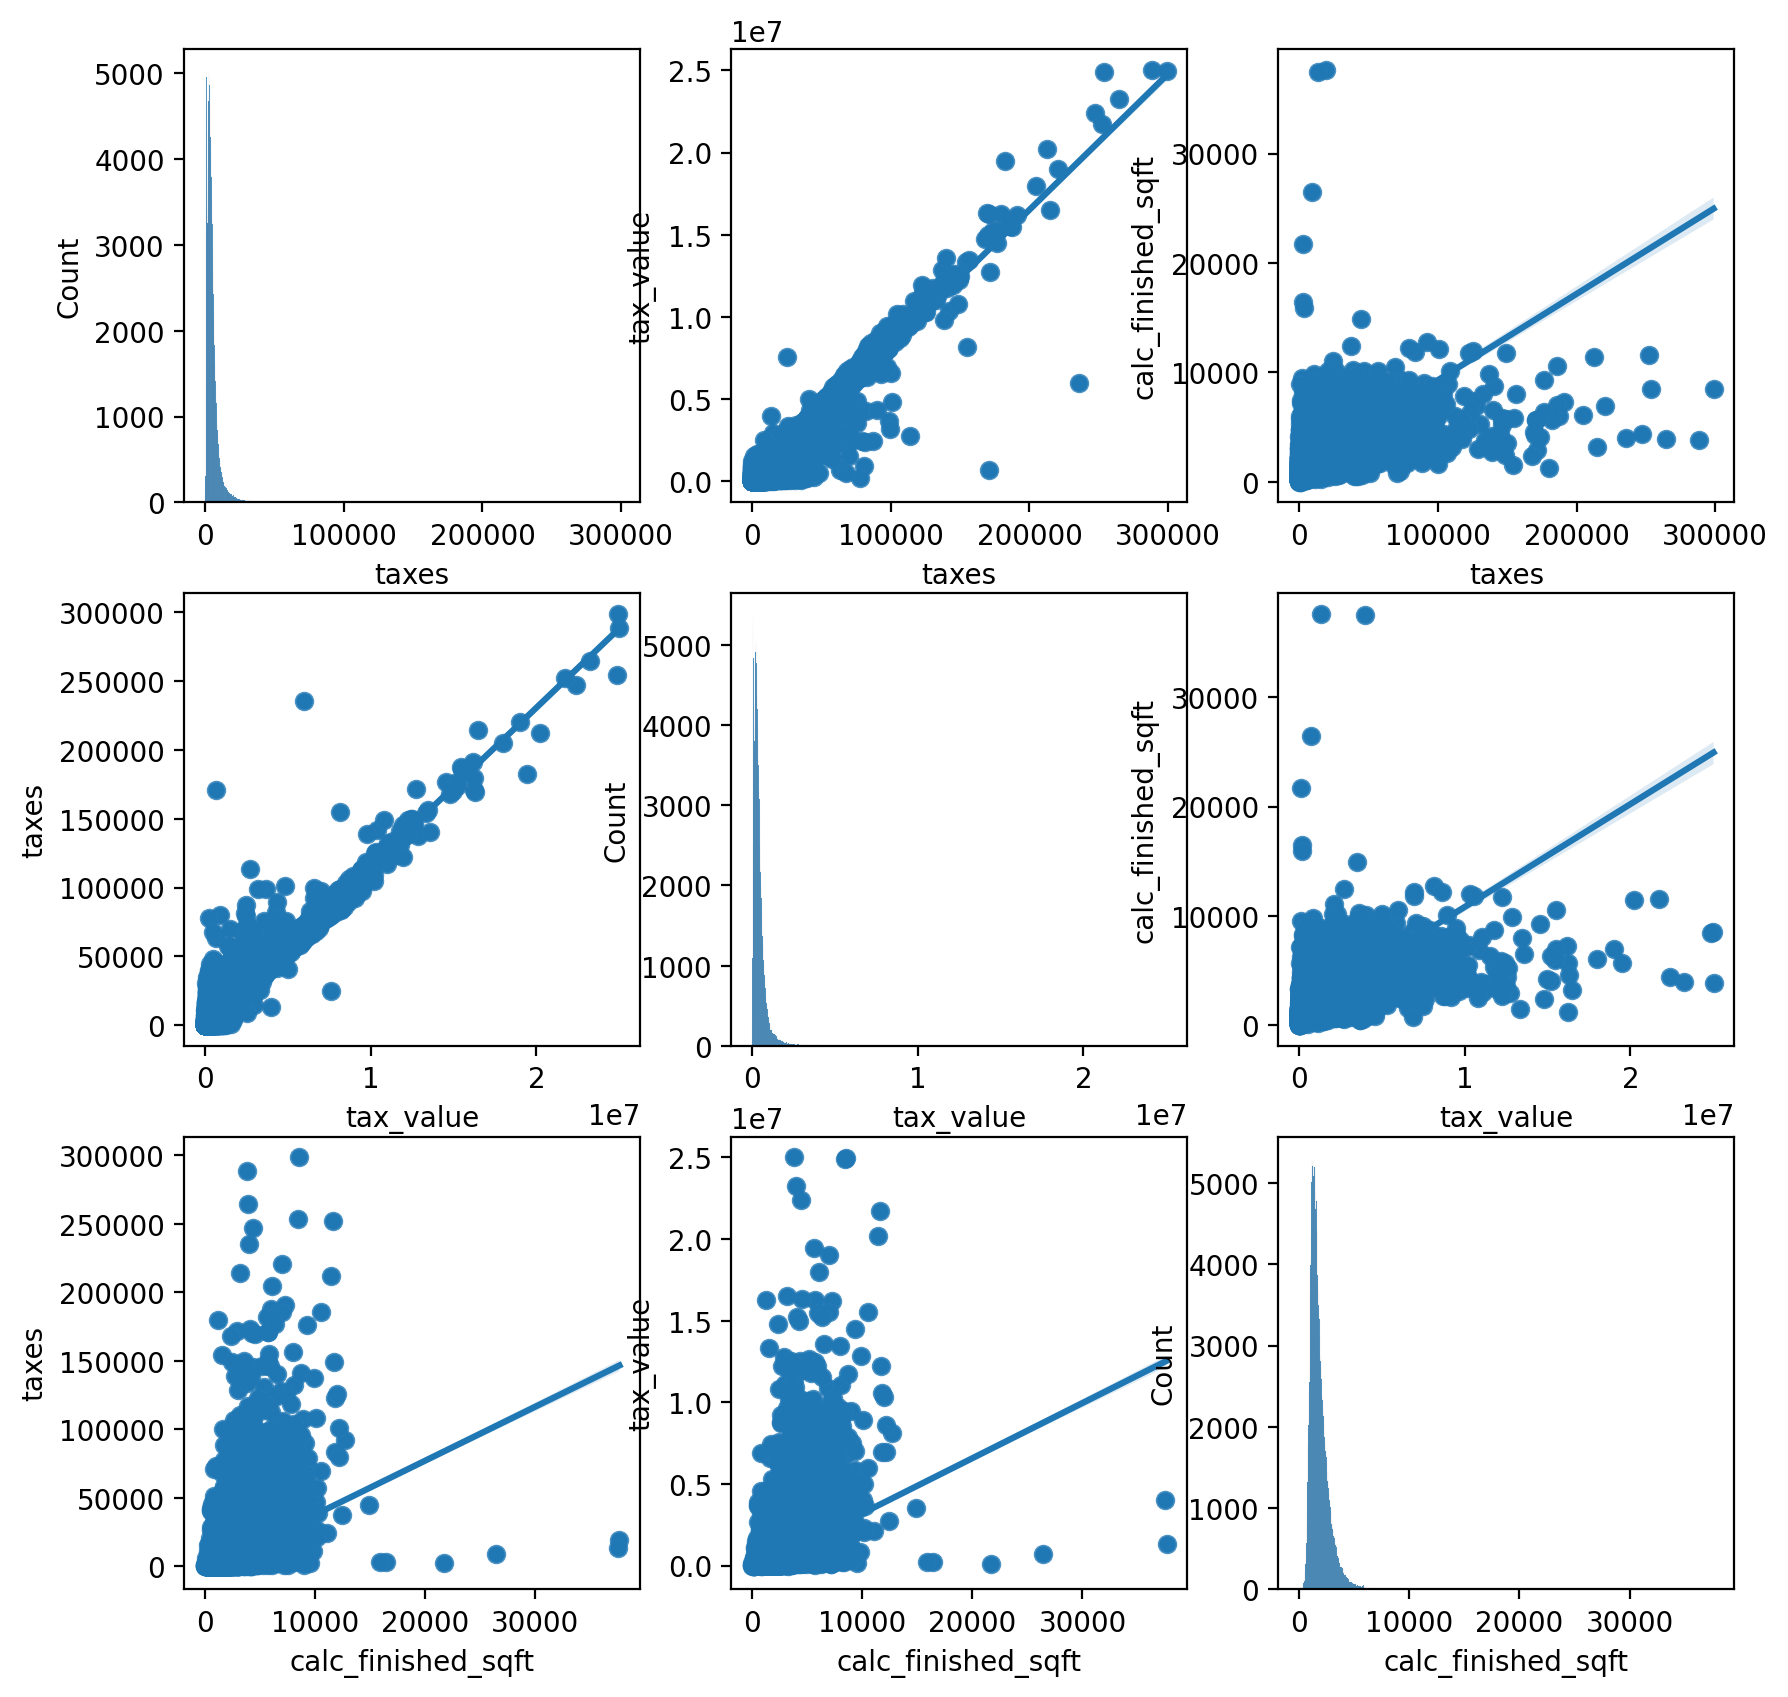

In [14]:
train_sample = train.sample(frac=.1)
plot_variable_pairs(train_sample[['taxes','tax_value','calc_finished_sqft']])

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [15]:
def plot_categorical(ser:pd.Series,ax:plt.axes):
    sns.countplot(ser,ax=ax[0])
    ax[1].pie(ser.value_counts(),labels=ser.unique())
def plot_continuous(ser:pd.Series,ax:plt.axes):
    sns.histplot(ser,ax=ax[0])
    sns.violinplot(ser,ax=ax[1])
def plot_categorical_and_continuous(df:pd.DataFrame,categorical:typing.List[str])->None:
    fig,axs = plt.subplots(df.shape[1],2,figsize=(9,df.shape[1]*3))
    for i,d in enumerate(df):
        if d in categorical:
            plot_categorical(df[d],axs[i,:])
        else:
            plot_continuous(df[d],axs[i,:])
    plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

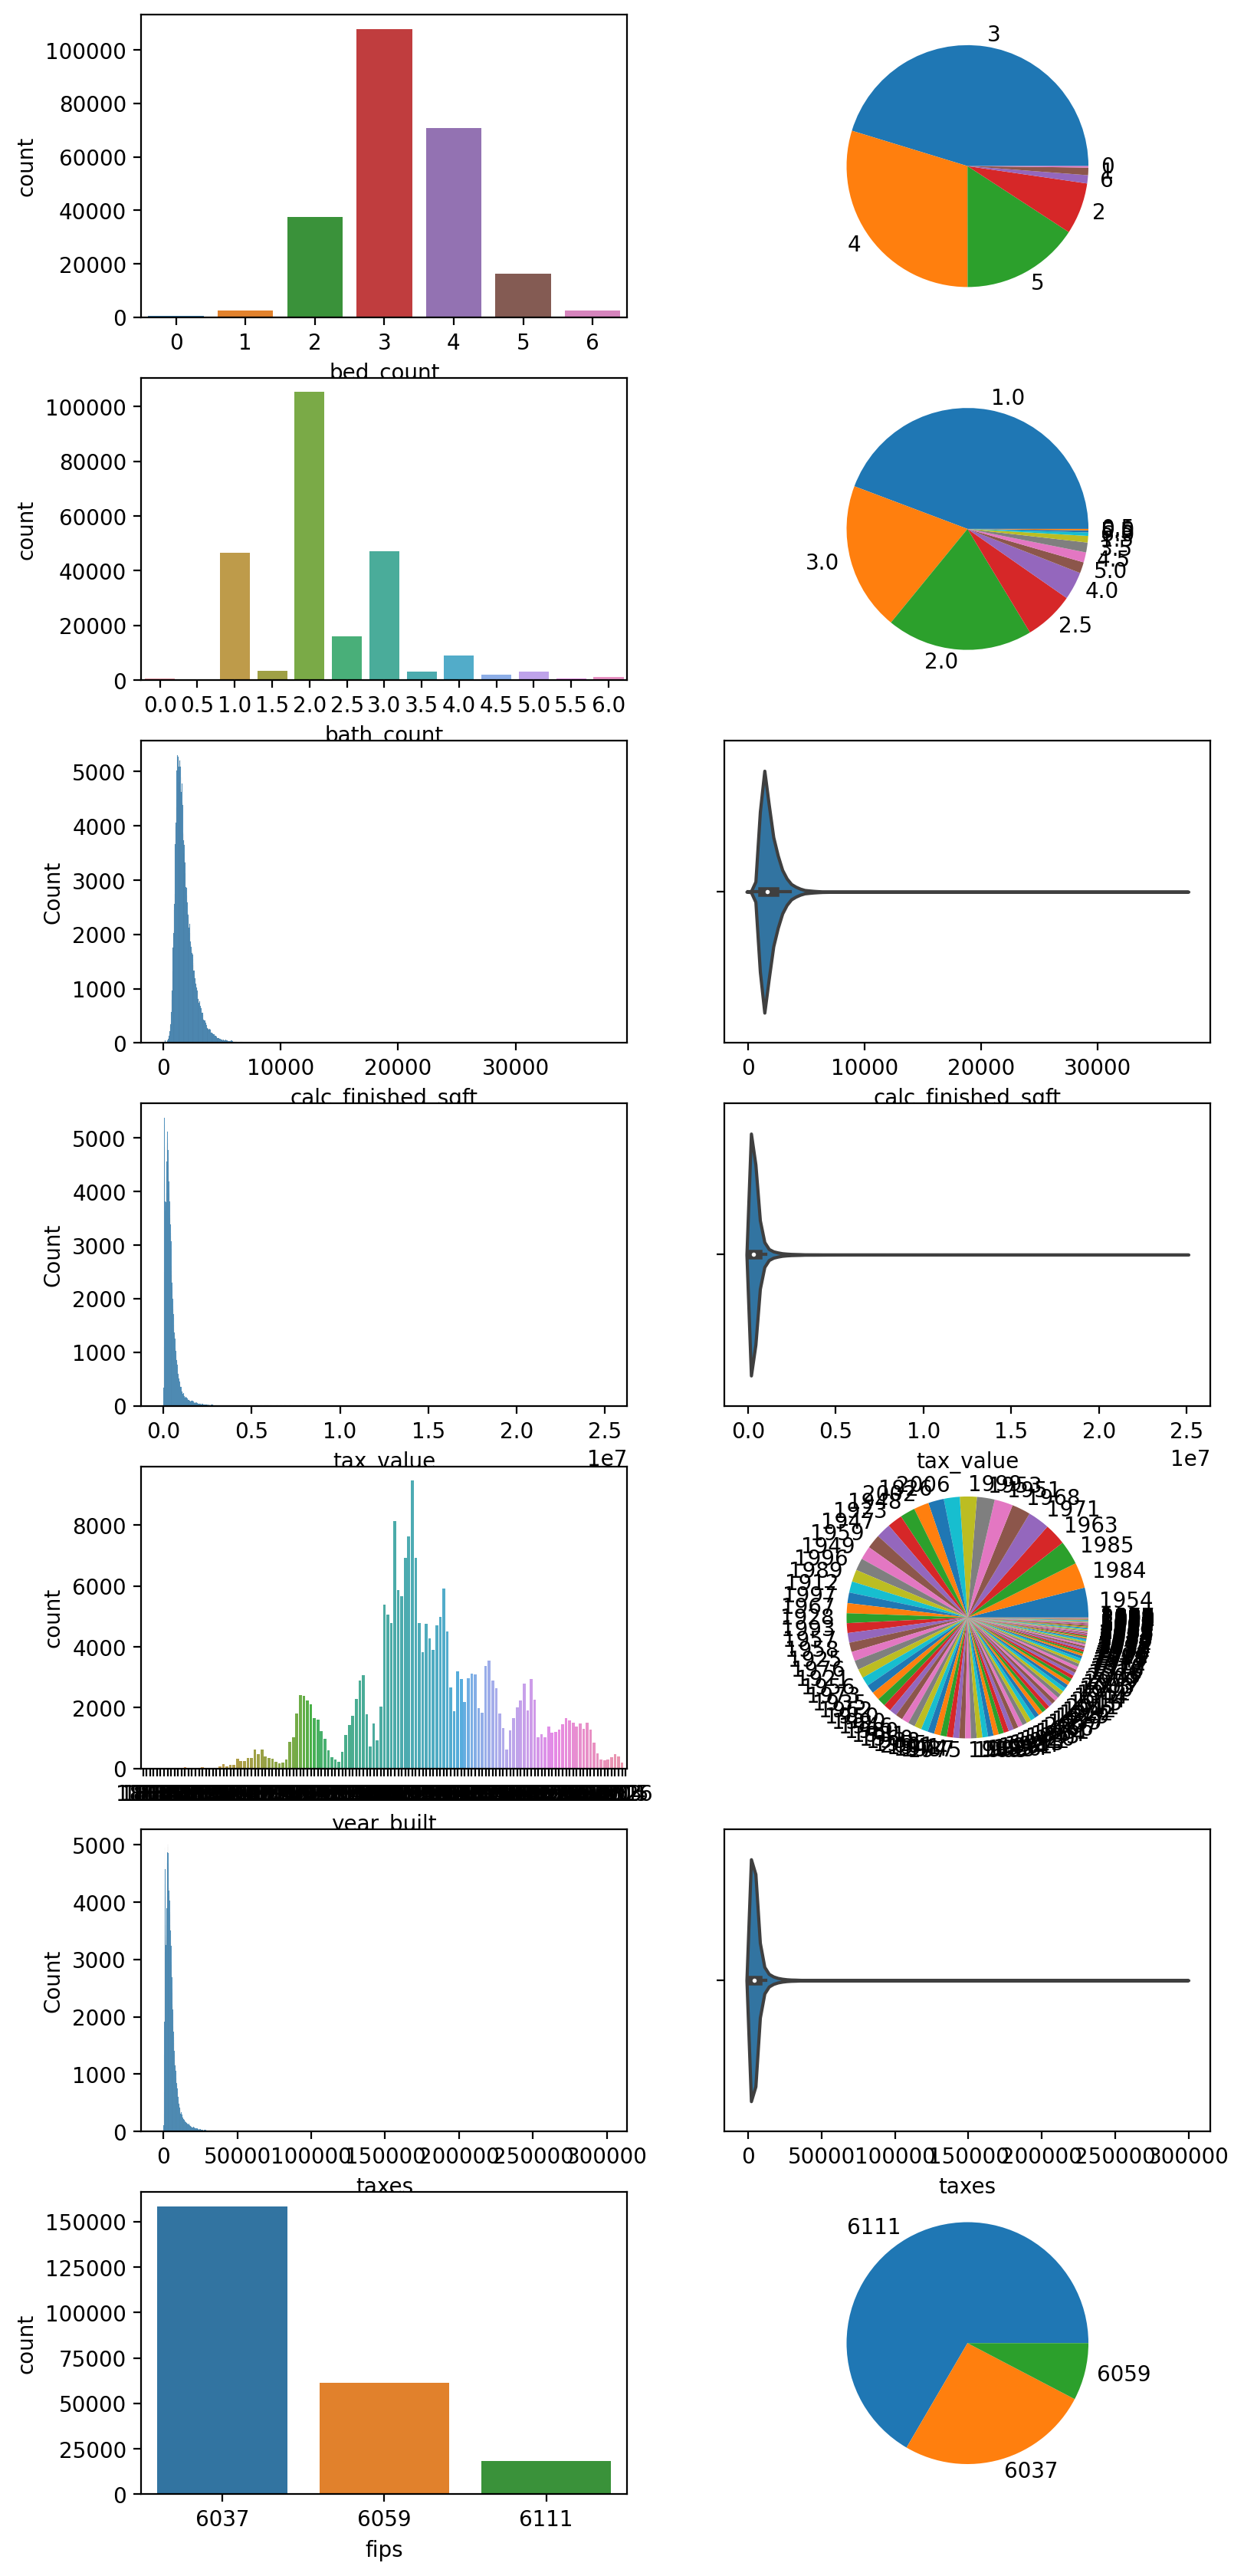

In [16]:
plot_categorical_and_continuous(train_sample,['fips','bed_count','bath_count','year_built'])

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Come up with some initial hypotheses based on your goal of predicting property value.

Visualize all combinations of variables in some way.

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Explore your dataset with any other visualizations you think will be helpful.